In [1]:
#
#Fitting Dugoff on Pacejka52
#

import numpy as np
import matplotlib.pyplot as plt

import Dugoff as d
import Pacejka52 as pa52

Fz = 4000
Fz0 = 3114
IA = 0

i=1000
Sx = np.linspace(-1,1,i)
Sy = np.linspace(-0.3,0.3,i)

params_Fx_init = [300000, 120000, 0.8]
params_Fy_init = [300000, 120000, 0.8]

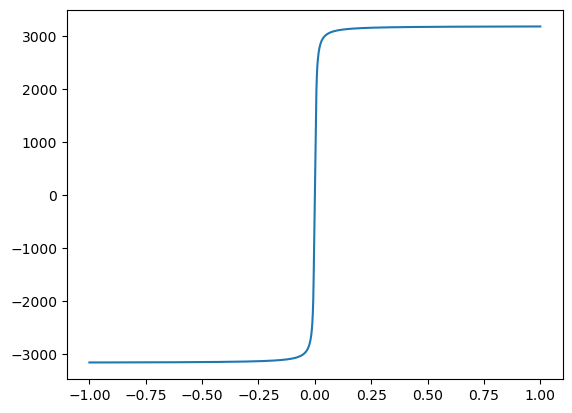

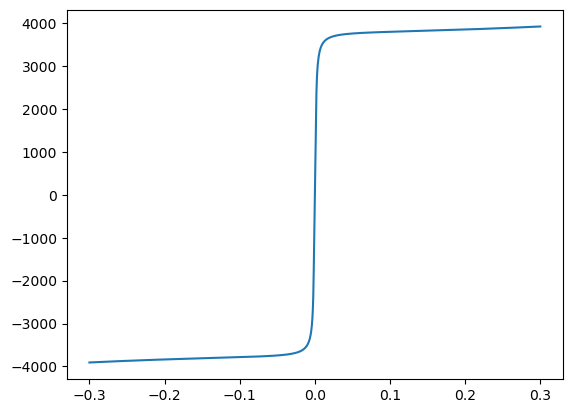

In [2]:
Fx_d = d.dugoff_long(Sx,Sy,Fz, *params_Fx_init)
Fy_d = d.dugoff_lat(Sx,Sy,Fz, *params_Fy_init)

plt.figure(1)
plt.plot(Sx,Fx_d)

plt.figure(2)
plt.plot(Sy,Fy_d)



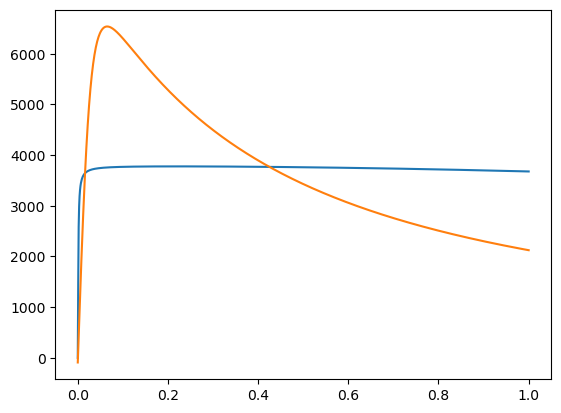

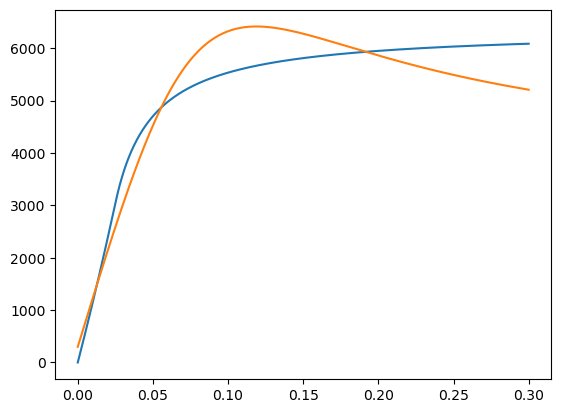

In [6]:
#Fitting
import scipy.optimize as opt
from scipy.optimize import curve_fit
#Pacejka 52

Sx = np.linspace(0,1,1000)
Sy = np.linspace(0,0.3,1000)

params_Fx_init = [300000, 1200000, 0.8] # Cs, Ca, mu
params_Fy_init = [300000, 1200000, 0.8] # Cs, Ca, mu

Fx_pa = pa52.Pacejka52_long(Fz,Sx,IA,Fz0)[0]
Fy_pa = pa52.Pacejka52_lat(Fz,Sy,IA,Fz0)[0]


def Fx_br_func(Sx,Cs,Ca, mu):
    return d.dugoff_long(Sx,Sy,Fz,Cs,Ca,mu)

def Fy_br_func(Sy,Cs,Ca, mu):
    return d.dugoff_lat(Sx,Sy,Fz,Cs,Ca,mu)

Fx_br_params, _ = curve_fit(Fx_br_func, Sx, Fx_pa, params_Fx_init,maxfev = 8000)
Fy_br_params, _ = curve_fit(Fy_br_func, Sy, Fy_pa, params_Fy_init,maxfev = 8000)

Fx_br_fit = Fx_br_func(Sx,Fx_br_params[0],Fx_br_params[1],Fx_br_params[2])
Fy_br_fit = Fy_br_func(Sy,Fy_br_params[0],Fy_br_params[1],Fy_br_params[2])

plt.figure(1)
plt.plot(Sx,Fx_br_fit)
plt.plot(Sx,Fx_pa)

plt.figure(2)
plt.plot(Sy,Fy_br_fit)
plt.plot(Sy,Fy_pa)